In [5]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df

,id,order_date,user_id,product_id,quality
0,24,2019-01-03,62746,1,1
1,8989,2019-01-01,53424,28,1
2,8990,2019-01-01,53424,28,1
3,8991,2019-01-01,53424,28,1
4,8992,2019-01-01,53424,28,1
...,...,...,...,...,...
532384,636445,2019-12-27,52375,77,1
532385,636446,2019-12-27,52375,77,1
532386,636451,2019-12-27,118653,96,1
532387,636452,2019-12-27,118653,821,1


In [6]:
user_total = df.groupby("user_id")["quality"].sum().reset_index()
user_total.rename(columns={"quality": "total_quality"}, inplace=True)

user_total

,user_id,total_quality
0,6,3
1,9,14
2,12,9
3,82,4
4,98,39
...,...,...
28063,139507,1
28064,139530,1
28065,139541,15
28066,139596,6


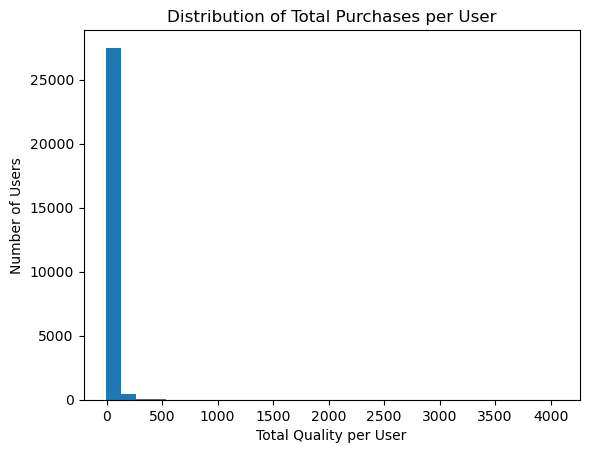

In [7]:
import matplotlib.pyplot as plt

plt.hist(user_total["total_quality"], bins=30)
plt.xlabel("Total Quality per User")
plt.ylabel("Number of Users")
plt.title("Distribution of Total Purchases per User")
plt.show()

In [9]:
mean_val = user_total["total_quality"].mean()
var_val = user_total["total_quality"].var()

mean_val, var_val

(22.860446059569618, 4397.5934858451465)

Distribusi total pembelian per user menunjukkan pola yang sangat skewed ke kanan, dengan mayoritas user hanya melakukan sedikit pembelian dan sebagian kecil user melakukan pembelian dalam jumlah besar. Karena data berupa count dan memiliki overdispersion, distribusi Negative Binomial adalah yang paling cocok. Apalagi dibuktikan dengan variance > mean, cocok dengan distribusi Negative Binomial.

Mayoritas user hanya melakukan sedikit pembelian, sehingga perusahaan perlu memperkuat strategi retensi seperti memberikan promo untuk pembelian kedua, mengirim pengingat setelah order pertama, atau menawarkan free delivery untuk mendorong repeat order. 

Di sisi lain, terdapat kelompok kecil user dengan pembelian tinggi yang menjadi penyumbang pendapatan terbesar; mereka perlu dijaga melalui program loyalitas, diskon eksklusif, dan akses awal ke menu baru. Dengan pola pembelian yang sangat bervariasi, perusahaan dapat melakukan segmentasi user menjadi low-value, medium, dan high-value untuk menyesuaikan pendekatan pemasaran dan retensi. Fokus utama sebaiknya diarahkan pada peningkatan repeat order user baru serta mempertahankan heavy users yang memberikan kontribusi terbesar terhadap revenue.